# Exploring the Data


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Reading train and test data ###
test_df= pd.read_csv('unfinished.csv', sep=',', header=0)
train_df= pd.read_csv('finished.csv', sep=',', header=0)

# data column types
train_df.info()

# what the data looks like
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173823 entries, 0 to 173822
Data columns (total 15 columns):
backers_count            173823 non-null int64
category                 173823 non-null object
country                  173823 non-null object
creator                  173823 non-null int64
currency                 173823 non-null object
disable_communication    173823 non-null bool
goal                     173823 non-null float64
is_starrable             173823 non-null bool
staff_pick               173823 non-null bool
state                    173823 non-null int64
urls                     173823 non-null object
usd_pledged              173823 non-null float64
location                 173823 non-null object
blurb_length             173823 non-null int64
duration                 173823 non-null int64
dtypes: bool(3), float64(2), int64(5), object(5)
memory usage: 16.4+ MB


,backers_count,category,country,creator,currency,disable_communication,goal,is_starrable,staff_pick,state,urls,usd_pledged,location,blurb_length,duration
0,80,art/mixed media,US,483835381,USD,False,2800.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,3596.0,"Paonia, CO",21,21
1,47,art,US,1536850207,USD,False,3900.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,4117.0,"Bakersfield, CA",26,23
2,80,art/painting,US,2039713907,USD,False,750.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,3125.0,"Lowell, MA",12,19
3,82,art/public art,US,17146650,USD,False,4500.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,4586.0,"Washington, DC",20,40
4,31,art/painting,US,1442314751,USD,False,1000.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,1036.0,"Portland, OR",10,5


In [81]:
### merging train and test data for exploration ###
train_df["train"] = True
test_df["train"] = False

df = pd.concat([train_df, test_df], ignore_index=True)

In [82]:
### describing the numerical values of the data ###
df.describe()
### describing non-numerical values of the data ###
df.describe(exclude=[np.number])

,backers_count,creator,goal,usd_pledged,blurb_length,duration
count,177768.000000,1.777680e+05,1.777680e+05,1.777680e+05,177768.000000,177768.000000
mean,129.263743,1.073674e+09,4.556443e+04,1.065866e+04,19.360430,33.611977
std,925.448230,6.198828e+08,1.208635e+06,8.128235e+04,4.845785,12.721739
min,0.000000,3.000000e+00,1.000000e-02,0.000000e+00,0.000000,1.000000
25%,3.000000,5.383356e+08,1.600000e+03,6.852201e+01,17.000000,30.000000
50%,22.000000,1.073209e+09,5.000000e+03,1.226000e+03,20.000000,30.000000
75%,77.000000,1.610515e+09,1.334045e+04,5.550000e+03,23.000000,36.000000
max,105857.000000,2.147465e+09,1.523501e+08,1.026685e+07,35.000000,92.000000


,category,country,currency,disable_communication,is_starrable,staff_pick,state,urls,location,train
count,177768,177768,177768,177768,177768,177768,177768,177768,177768,177768
unique,168,22,14,2,2,2,3,177768,14399,2
top,music/pop,US,USD,False,False,False,1,{'project': 'https://www.kickstarter.com/proje...,"Los Angeles, CA",True
freq,2400,139933,139933,177167,174065,155323,91355,1,9024,173823


### backers_count

- TODO

count    177768.000000
mean        129.263743
std         925.448230
min           0.000000
25%           3.000000
50%          22.000000
75%          77.000000
max      105857.000000
Name: backers_count, dtype: float64

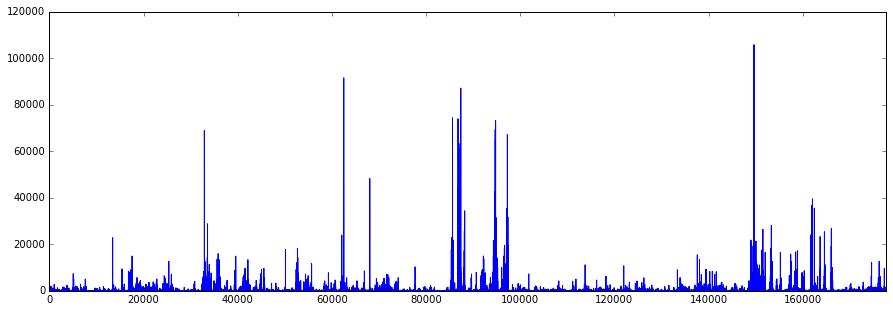

In [83]:
df.backers_count.describe()
df.backers_count.plot(figsize=(15,5))

### creator

- TODO

In [84]:
df.creator.describe()

count    1.777680e+05
mean     1.073674e+09
std      6.198828e+08
min      3.000000e+00
25%      5.383356e+08
50%      1.073209e+09
75%      1.610515e+09
max      2.147465e+09
Name: creator, dtype: float64

### goal

- TODO

count    1.777680e+05
mean     4.556443e+04
std      1.208635e+06
min      1.000000e-02
25%      1.600000e+03
50%      5.000000e+03
75%      1.334045e+04
max      1.523501e+08
Name: goal, dtype: float64

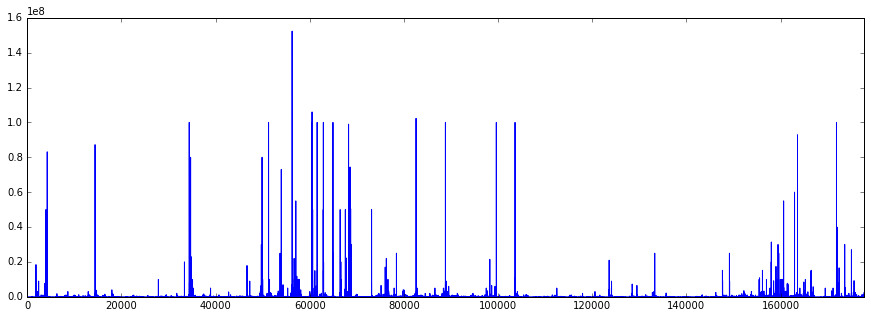

In [85]:
df.goal.describe()
df.goal.plot(figsize=(15,5))

### usd_pledged

count    1.777680e+05
mean     1.065866e+04
std      8.128235e+04
min      0.000000e+00
25%      6.852201e+01
50%      1.226000e+03
75%      5.550000e+03
max      1.026685e+07
Name: usd_pledged, dtype: float64

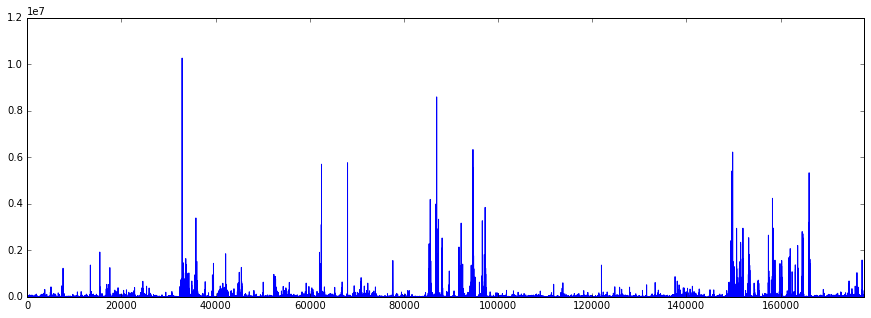

In [86]:
df.usd_pledged.describe()
df.usd_pledged.plot(figsize=(15,5))

### blurb_length

count    177768.000000
mean         19.360430
std           4.845785
min           0.000000
25%          17.000000
50%          20.000000
75%          23.000000
max          35.000000
Name: blurb_length, dtype: float64

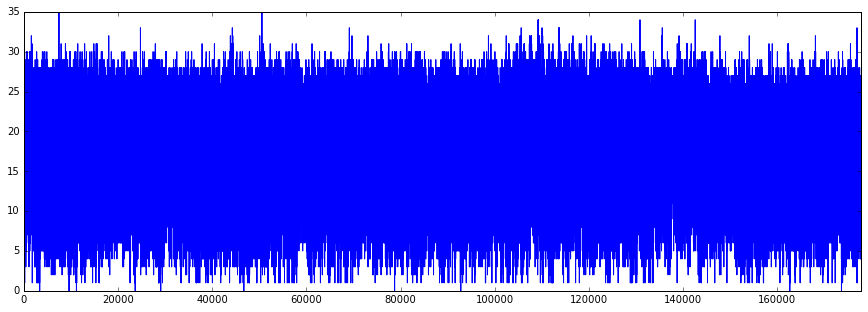

In [87]:
df.blurb_length.describe()
df.blurb_length.plot(figsize=(15,5))

### duration

count    177768.000000
mean         33.611977
std          12.721739
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: duration, dtype: float64

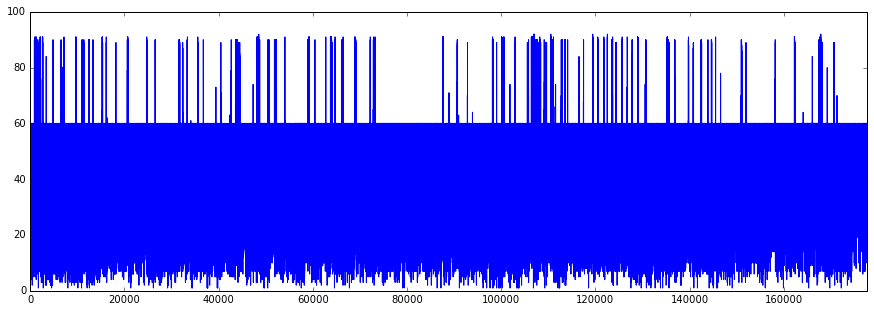

In [88]:
df.duration.describe()
df.duration.plot(figsize=(15,5))

### category

- TODO

In [89]:
df.category.describe()
df.category.value_counts()

count        177768
unique          168
top       music/pop
freq           2400
Name: category, dtype: object

music/pop                      2400
fashion/apparel                2400
film & video/narrative film    2400
film & video/animation         2400
music/hip-hop                  2400
technology/hardware            2400
music/rock                     2400
games/playing cards            2400
food/drinks                    2400
publishing/art books           2400
design/product design          2400
publishing/nonfiction          2400
film & video/shorts            2400
technology/software            2400
music/classical music          2400
art/painting                   2400
technology/web                 2400
art/illustration               2400
fashion/accessories            2400
film & video/documentary       2400
music/country & folk           2400
games/video games              2400
art/public art                 2400
games/tabletop games           2400
music/indie rock               2400
film & video/webseries         2400
publishing/children's books    2400
publishing/fiction          

### country

- TODO

In [90]:
df.country.describe()

df.country.value_counts()

count     177768
unique        22
top           US
freq      139933
Name: country, dtype: object

US    139933
GB     15406
CA      6857
AU      3581
DE      1814
NL      1382
FR      1324
IT      1268
ES      1006
MX       876
SE       875
NZ       661
DK       575
IE       400
NO       360
CH       328
BE       311
HK       269
AT       248
SG       221
JP        46
LU        27
Name: country, dtype: int64

### currency

- TODO

In [91]:
df.currency.describe()

df.currency.value_counts()

count     177768
unique        14
top          USD
freq      139933
Name: currency, dtype: object

USD    139933
GBP     15406
EUR      7780
CAD      6857
AUD      3581
MXN       876
SEK       875
NZD       661
DKK       575
NOK       360
CHF       328
HKD       269
SGD       221
JPY        46
Name: currency, dtype: int64

### disable_communication

- TODO

In [92]:
df.disable_communication.describe()

count     177768
unique         2
top        False
freq      177167
Name: disable_communication, dtype: object

### is_starrable

- TODO

In [93]:
df.is_starrable.describe()

count     177768
unique         2
top        False
freq      174065
Name: is_starrable, dtype: object

### staff_pick

- TODO

In [94]:
df.staff_pick.describe()

count     177768
unique         2
top        False
freq      155323
Name: staff_pick, dtype: object

### state

- TODO

In [95]:
df.state.describe()

df.state.value_counts()

count     177768
unique         3
top            1
freq       91355
Name: state, dtype: int64

1       91355
0       82468
live     3945
Name: state, dtype: int64

### urls

- TODO

### location

In [96]:
df.location.describe()

count              177768
unique              14399
top       Los Angeles, CA
freq                 9024
Name: location, dtype: object